In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)  # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)  # predicts True and False for these 2 flowers
 

In [45]:
# Perceptron model (MLP)
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)  # about 0.505

In [11]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [12]:
X_train.shape

(55000, 28, 28)

In [13]:
X_train.dtype

dtype('uint8')

In [14]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [15]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [16]:
class_names[y_train[0]]

'Ankle boot'

In [17]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax")) 

2023-05-08 19:06:27.326241: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))


In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.layers

In [22]:
hidden1 = model.layers[1]

In [23]:
hidden1.name

'dense_3'

In [25]:
model.get_layer('dense_3') is hidden1

True

In [26]:
weights, biases = hidden1.get_weights()

In [27]:
weights

array([[-0.06171361,  0.0293217 , -0.05388897, ...,  0.06441115,
         0.02084315,  0.00283218],
       [-0.05225495, -0.06904732,  0.00926107, ..., -0.03833615,
         0.06817596, -0.06658553],
       [-0.03824478, -0.00198987,  0.01059842, ..., -0.054388  ,
         0.04202431, -0.07093581],
       ...,
       [-0.0011293 , -0.06913378, -0.02630683, ..., -0.02452613,
         0.02412472,  0.02167475],
       [-0.04843716,  0.06699221,  0.01470314, ..., -0.05321722,
        -0.03797907, -0.01775091],
       [ 0.01864048, -0.05052406, -0.04592517, ..., -0.06391054,
        -0.00972158, -0.00251523]], dtype=float32)

In [28]:
weights.shape

(784, 300)

In [29]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [30]:
biases.shape

(300,)

In [31]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [32]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7298 - accuracy: 0.7584 - val_loss: 0.5131 - val_accuracy: 0.8256
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4883 - accuracy: 0.8303 - val_loss: 0.4578 - val_accuracy: 0.8346
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4395 - accuracy: 0.8453 - val_loss: 0.4212 - val_accuracy: 0.8526
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4140 - accuracy: 0.8553 - val_loss: 0.3931 - val_accuracy: 0.8618
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3927 - accuracy: 0.8619 - val_loss: 0.3905 - val_accuracy: 0.8624
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3760 - accuracy: 0.8674 - val_loss: 0.3889 - val_accuracy: 0.8642
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3635 - accuracy: 0.8706 - val_loss: 0.3686 - val_accuracy:

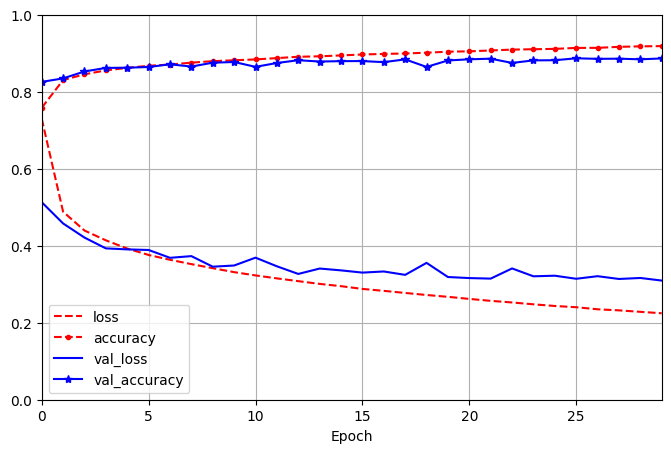

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [34]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3263 - accuracy: 0.8830


[0.3263233006000519, 0.8830000162124634]

In [35]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 95ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [36]:
import numpy as np

In [37]:
y_pred = y_proba.argmax(axis=-1)

In [38]:
y_pred

array([9, 2, 1])

In [39]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [40]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [41]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
1719/1719 [==============================] - 5s 3ms/step - loss: 8.5965 - root_mean_squared_error: 2.9320 - val_loss: 8.4135 - val_root_mean_squared_error: 2.9008
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.3018 - root_mean_squared_error: 2.8813 - val_loss: 8.3911 - val_root_mean_squared_error: 2.8969
Epoch 3/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.2859 - root_mean_squared_error: 2.8785 - val_loss: 8.3996 - val_root_mean_squared_error: 2.8983
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.2803 - root_mean_squared_error: 2.8776 - val_loss: 8.4584 - val_root_mean_squared_error: 2.9084
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 8.2744 - root_mean_squared_error: 2.8765 - val_loss: 8.3906 - val_root_mean_squared_error: 2.8969
Epoch 6/20
1719/1719 [==============================] - 5s 3ms/step - loss: 8.2638 - root_mean_squared_error: 2.8747 - val_loss: 8

In [46]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [47]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])


In [48]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.4916 - root_mean_squared_error: 1.2213 - val_loss: 2.8412 - val_root_mean_squared_error: 1.6856
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4911 - root_mean_squared_error: 0.7008 - val_loss: 0.4796 - val_root_mean_squared_error: 0.6926
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4155 - root_mean_squared_error: 0.6446 - val_loss: 0.4804 - val_root_mean_squared_error: 0.6931
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3992 - root_mean_squared_error: 0.6318 - val_loss: 0.4114 - val_root_mean_squared_error: 0.6414
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3913 - root_mean_squared_error: 0.6255 - val_loss: 0.3613 - val_root_mean_squared_error: 0.6011
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3806 - root_mean_squared_error: 0.6169 - val_loss: 0.3857 - val_

In [49]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],
                       outputs=[output, aux_output])


In [50]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError"])

In [51]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 [==============================] - 2s 2ms/step - loss: 1.7773 - dense_24_loss: 1.7349 - dense_25_loss: 2.1585 - dense_24_root_mean_squared_error: 1.3172 - dense_25_root_mean_squared_error: 1.4692 - val_loss: 1.0440 - val_dense_24_loss: 0.8000 - val_dense_25_loss: 3.2399 - val_dense_24_root_mean_squared_error: 0.8944 - val_dense_25_root_mean_squared_error: 1.8000
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6096 - dense_24_loss: 0.6009 - dense_25_loss: 0.6879 - dense_24_root_mean_squared_error: 0.7752 - dense_25_root_mean_squared_error: 0.8294 - val_loss: 1.3594 - val_dense_24_loss: 1.0641 - val_dense_25_loss: 4.0165 - val_dense_24_root_mean_squared_error: 1.0316 - val_dense_25_root_mean_squared_error: 2.0041
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5067 - dense_24_loss: 0.4972 - dense_25_loss: 0.5920 - dense_24_root_mean_squared_error: 0.7051 - dense_25_root_mean_squared_error: 0.7694 - val_loss: 0.653

In [52]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results


162/162 [==============================] - 0s 1ms/step - loss: 0.3351 - dense_24_loss: 0.3283 - dense_25_loss: 0.3958 - dense_24_root_mean_squared_error: 0.5730 - dense_25_root_mean_squared_error: 0.6291


In [53]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 80ms/step


In [54]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

1/1 [==============================] - 0s 19ms/step


In [55]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

model = WideAndDeepModel(30, activation="relu", name="my_cool_model")



In [58]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError"])
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)
model.save("my_keras_model", save_format="tf")

Epoch 1/20
363/363 [==============================] - 2s 2ms/step - loss: 761.9725 - output_1_loss: 637.0640 - output_2_loss: 1886.1497 - output_1_root_mean_squared_error: 25.2401 - output_2_root_mean_squared_error: 43.4298 - val_loss: 8.5108 - val_output_1_loss: 6.9878 - val_output_2_loss: 22.2172 - val_output_1_root_mean_squared_error: 2.6434 - val_output_2_root_mean_squared_error: 4.7135
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 3.1850 - output_1_loss: 3.2297 - output_2_loss: 2.7820 - output_1_root_mean_squared_error: 1.7971 - output_2_root_mean_squared_error: 1.6679 - val_loss: 5.0870 - val_output_1_loss: 3.1538 - val_output_2_loss: 22.4852 - val_output_1_root_mean_squared_error: 1.7759 - val_output_2_root_mean_squared_error: 4.7419
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 2.0768 - output_1_loss: 2.0532 - output_2_loss: 2.2896 - output_1_root_mean_squared_error: 1.4329 - output_2_root_mean_squared_error: 1.5132 - val_

INFO:tensorflow:Assets written to: my_keras_model/assets


INFO:tensorflow:Assets written to: my_keras_model/assets


In [59]:
model = tf.keras.models.load_model("my_keras_model")
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 82ms/step


In [65]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints",
                                                   save_weights_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                                profile_batch=(100, 200))

history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])


Epoch 1/20


2023-05-11 17:19:21.365701: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-05-11 17:19:21.365729: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-05-11 17:19:21.366182: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.


269/363 [=====================>........] - ETA: 0s - loss: 1.2817 - output_1_loss: 1.1539 - output_2_loss: 2.4326 - output_1_root_mean_squared_error: 1.0742 - output_2_root_mean_squared_error: 1.5597

2023-05-11 17:19:21.856118: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-05-11 17:19:21.856130: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-05-11 17:19:21.963996: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2023-05-11 17:19:21.972298: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-05-11 17:19:21.975389: I tensorflow/core/profiler/rpc/client/save_profile.cc:164] Collecting XSpace to repository: my_logs/run_2023_05_11_17_19_17/plugins/profile/2023_05_11_17_19_21/jerrys-mbp.lan.xplane.pb


363/363 [==============================] - 1s 2ms/step - loss: 1.9926 - output_1_loss: 1.9425 - output_2_loss: 2.4440 - output_1_root_mean_squared_error: 1.3937 - output_2_root_mean_squared_error: 1.5633 - val_loss: 10.7478 - val_output_1_loss: 11.5547 - val_output_2_loss: 3.4854 - val_output_1_root_mean_squared_error: 3.3992 - val_output_2_root_mean_squared_error: 1.8669
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.5319 - output_1_loss: 1.5100 - output_2_loss: 1.7285 - output_1_root_mean_squared_error: 1.2288 - output_2_root_mean_squared_error: 1.3147 - val_loss: 3.8686 - val_output_1_loss: 4.0534 - val_output_2_loss: 2.2055 - val_output_1_root_mean_squared_error: 2.0133 - val_output_2_root_mean_squared_error: 1.4851
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 2.7310 - output_1_loss: 2.8629 - output_2_loss: 1.5441 - output_1_root_mean_squared_error: 1.6920 - output_2_root_mean_squared_error: 1.2426 - val_loss: 1.0236 - val_o

In [63]:
# Custom callback for val loss: train loss ratio
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

In [64]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()  # e.g., my_logs/run_2022_08_01_17_25_59



In [66]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs


In [68]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)

        data = (np.random.randn(100) + 2) * step / 100  # gets larger
        tf.summary.histogram("my_hist", data, buckets=50, step=step)

        images = np.random.rand(2, 32, 32, 3) * step / 1000  # gets brighter
        tf.summary.image("my_images", images, step=step)

        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)

        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)


### Fine tuning hyperparameters

In [70]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model



In [72]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=10, overwrite=False,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))


Trial 10 Complete [00h 00m 07s]
val_accuracy: 0.005426356568932533

Best val_accuracy So Far: 0.005426356568932533
Total elapsed time: 00h 00m 34s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [73]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [74]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 7,
 'n_neurons': 51,
 'learning_rate': 0.0003491260272208854,
 'optimizer': 'adam'}

In [75]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 09 summary
Hyperparameters:
n_hidden: 7
n_neurons: 51
learning_rate: 0.0003491260272208854
optimizer: adam
Score: 0.005426356568932533


In [76]:
best_trial.metrics.get_last_value("val_accuracy")

0.005426356568932533

In [77]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)


Epoch 1/10
484/484 [==============================] - 2s 1ms/step - loss: 1.1962 - accuracy: 0.0024
Epoch 2/10
484/484 [==============================] - 1s 1ms/step - loss: 1.1824 - accuracy: 0.0028
Epoch 3/10
484/484 [==============================] - 1s 1ms/step - loss: 1.1826 - accuracy: 0.0028
Epoch 4/10
484/484 [==============================] - 1s 1ms/step - loss: 1.1792 - accuracy: 0.0025
Epoch 5/10
484/484 [==============================] - 1s 1ms/step - loss: 1.1630 - accuracy: 0.0025
Epoch 6/10
484/484 [==============================] - 0s 1ms/step - loss: 1.1533 - accuracy: 0.0025
Epoch 7/10
484/484 [==============================] - 1s 1ms/step - loss: 1.1515 - accuracy: 0.0025
Epoch 8/10
484/484 [==============================] - 1s 1ms/step - loss: 1.1520 - accuracy: 0.0027
Epoch 9/10
484/484 [==============================] - 1s 1ms/step - loss: 1.1460 - accuracy: 0.0024
Epoch 10/10
162/162 [==============================] - 0s 739us/step - loss: 1.4595 - accuracy: 0.00

In [78]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)

    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)

In [79]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory="my_fashion_mnist", project_name="hyperband")


In [80]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
                       validation_data=(X_valid, y_valid),
                       callbacks=[early_stopping_cb, tensorboard_cb])

Trial 60 Complete [00h 00m 04s]
val_accuracy: 0.004392764996737242

Best val_accuracy So Far: 0.004909560550004244
Total elapsed time: 00h 03m 20s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit
